# Final Project

## Scraping and cleaning the data

### Import libraries

In [1]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

#import beautiful soup
from urllib.request import urlopen
from bs4 import BeautifulSoup

# convert an address into latitude and longitude values
from geopy.geocoders import Nominatim

### Scrape and store wiki data

In [2]:
src = requests.get("https://en.wikipedia.org/wiki/List_of_neighbourhoods_in_Mumbai").text 
soup = BeautifulSoup(src, 'lxml')

### Storing neighbourhoods in a list

In [3]:
data = soup.find_all("li")

lst = []

for i in range(len(data)):
    lists = data[i].find_all('a')
    for l in lists:
        h = l.text
        #Storing only the listed names
        if len(h) > 0 and h[0].isalpha():
            lst.append(h)

In [4]:
lst = lst[:lst.index("Koombarwara") + 1] #Keeping only till the last neighbourhood name

### Creating DataFrame

In [5]:
df = pd.DataFrame(lst)
df.columns = ["Neighbourhood"]

### Replacing misspellings manually

In [6]:
replacement = {"Bandstand Promenade":"Bandstand", 
               "NESCO colony":"NESCO", 
               "Lokandwala township":"Lokhandwala", 
               "Nalasopara": "Nallasopara",
               "Shivaji Talav":"Shivaji Talao",
               "C.G.S. colony":"CGS Colony",
               "Khotachiwadi":"Kotachi Wadi",
               "Samta nagar":"Samata Nagar",
               "JB Nagar":"J B Nagar",
               "Thakur complex": "Asha Nagar Ground",
               "Asalfa":"Asalpha"}

df["Neighbourhood"].replace(replacement, inplace=True)

In [7]:
df.head()

,Neighbourhood
0,Amboli
1,Chakala
2,D.N. Nagar
3,Four Bungalows
4,J B Nagar


### Getting latitudes and longitudes of neighbourhoods using geopy

In [8]:
lats = []
longs = []

for k in df["Neighbourhood"]:
    address = k + ", Mumbai, India"
    geolocator = Nominatim(user_agent="ny_explorer")
    location = geolocator.geocode(address)
    try:
        latitude = location.latitude
        longitude = location.longitude
    except:
        latitude = None
        longitude = None    
    
    lats.append(latitude)
    longs.append(longitude)

In [9]:
#append to the dataframe

df["Latitude"] = lats
df["Longitude"] = longs

In [10]:
df.dropna(inplace = True)
df.drop(df[df["Neighbourhood"] == "Uttan"].index, inplace = True)
df.drop(df[df["Neighbourhood"] == "Gorai"].index, inplace = True)
df.drop(df[df["Neighbourhood"] == "Mahul"].index, inplace = True)
df.drop(df[df["Neighbourhood"] == "Model Town"].index, inplace = True)
df["Neighbourhood"][df["Neighbourhood"] == "Asha Nagar Ground"] = "Thakur Complex"

D:\Softwares\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [11]:
df.shape

(112, 3)

In [12]:
df

,Neighbourhood,Latitude,Longitude
0,Amboli,19.131992,72.849960
1,Chakala,19.115287,72.861808
2,D.N. Nagar,19.128292,72.830193
3,Four Bungalows,19.128794,72.825554
4,J B Nagar,18.938771,72.835335
5,Lokhandwala,19.143189,72.824081
6,Marol,19.117220,72.882342
8,Oshiwara,19.150244,72.834229
9,Poonam Nagar,19.136918,72.869128
10,Sahar,19.099595,72.867284


## Exploring the neighborhoods in Mumbai

### Define Foursquare credentials and version

In [13]:
CLIENT_ID = 'GAVU045VGDZUJVE1325QLDOLWOJZ35V20ZXLXKWHAFNXPGCT' # your Foursquare ID
CLIENT_SECRET = 'VSV2U3U4F005DKVE5WQN0N5DRSHHEFPLATXJJLGKDI4TSEW0' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: GAVU045VGDZUJVE1325QLDOLWOJZ35V20ZXLXKWHAFNXPGCT
CLIENT_SECRET:VSV2U3U4F005DKVE5WQN0N5DRSHHEFPLATXJJLGKDI4TSEW0


### Define function to explore nearby venues

In [14]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        #print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name'],
            v['venue']['id']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighbourhood',                             
                             'Neighbourhood Latitude',
                             'Neighbourhood Longitude', 
                             'Venue', 
                             'Venue Latitude', 
                             'Venue Longitude',
                             'Venue Category',
                             'Venue ID']
                            
    
    return(nearby_venues)

### Map Mumbai

In [15]:
address = "Mumbai"

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude

In [16]:
map_mumbai = folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to map
for lat, lng, label in zip(df['Latitude'], df['Longitude'], df['Neighbourhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_mumbai)  
    
map_mumbai

### Getting venues nearby

In [17]:
LIMIT = 100
radius = 500
mumbai_venues = getNearbyVenues(names = df['Neighbourhood'], latitudes = df['Latitude'], longitudes = df['Longitude'])

In [18]:
mumbai_venues.head()

,Neighbourhood,Neighbourhood Latitude,Neighbourhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category,Venue ID
0,Amboli,19.131992,72.84996,Cafe Arfa,19.128930,72.847140,Indian Restaurant,4d10d39b7177b1f7d2c75322
1,Amboli,19.131992,72.84996,"5 Spice , Bandra",19.130421,72.847206,Chinese Restaurant,4e4eb3c68877402b06b92160
2,Amboli,19.131992,72.84996,Domino's Pizza,19.131000,72.848000,Pizza Place,4ca7439514c33704cf9cc73b
3,Amboli,19.131992,72.84996,MCF Sports complex borivali,19.135466,72.851989,Gym / Fitness Center,4efe970a30f8992331275859
4,Amboli,19.131992,72.84996,SP Playground,19.136411,72.850406,Playground,4e16bb1cb3ad8e08699e25d7


In [19]:
mumbai_venues.shape

(1529, 8)

### Dropping duplicate venues

In [20]:
mumbai_venues.drop_duplicates(["Venue ID"], inplace = True)
mumbai_venues.reset_index(inplace = True, drop = True)

In [21]:
print('There are {} uniques categories.'.format(len(mumbai_venues['Venue Category'].unique())))

There are 182 uniques categories.


### Filtering out types restaurants/eateries

In [22]:
unique = mumbai_venues['Venue Category'].unique()

l = []
for b in unique:
    if sum([sub in b for sub in ["Restaurant", "Cafe", "Café", "Pizza", "Cream", "Dhaba", "Food","Pub", "Bar", "Coffee",
                                 "Donut", "Sandwich", "Bakery", "Dessert", "Cupcake", "Diner", "Snack", "Steak", "BBQ",
                                 "Bagel", "Bistro", "Burrito", "Deli", "Noodle", "Tea ", "Salad", "Gourmet", "Breakfast ",
                                 "Hot Dog", "Gastropub", "Creperie", "Cheese", "Yogurt", "Chaat", "Brewery"]]):
        l.append(b)

In [23]:
food = l[:]

### Creating more generalised categories (as much as possible) to improve our clustering later

### Food

In [24]:
#American and Latin American
mexamerican = ['Mexican Restaurant', 'Steakhouse', 'BBQ Joint', 'American Restaurant', 'South American Restaurant',
               'Hot Dog Joint', 'Tex-Mex Restaurant', 'New American Restaurant', 'Burrito Place']

#East Asian/Continental
asian = ['Chinese Restaurant', 'Asian Restaurant', 'Japanese Restaurant', 'Malay Restaurant', 
         'Dim Sum Restaurant', 'Noodle House', 'Thai Restaurant', 'Cantonese Restaurant']

#Middle Eastern
mughlai = ['Falafel Restaurant', 'Middle Eastern Restaurant', 'Mediterranean Restaurant', 
           'Afghan Restaurant', 'Mughlai Restaurant']

#Pubs and Bars
bars = ['Bar', 'Cocktail Bar', 'Wine Bar', 'Brewery', 'Sports Bar', 'Hotel Bar', 
        'Whisky Bar', 'Hookah Bar', 'Gastropub', 'Pub', 'Lounge', 'Nightclub']

#Italian
italian = ['Pizza Place', 'Italian Restaurant', 'Bistro', 'Deli / Bodega', 'Gourmet Shop', 'Cheese Shop']

#Desserts
dessert = ['Ice Cream Shop', 'Donut Shop', 'Bakery', 'Dessert Shop', 
           'Cupcake Shop', 'Bagel Shop', 'Creperie', 'Frozen Yogurt Shop']

#Other European
euro = ['Spanish Restaurant', 'Modern European Restaurant', 'German Restaurant', 'Portuguese Restaurant', 'French Restaurant']

#Cafes
cafe = ['Café', 'Coffee Shop', 'Irani Cafe', 'Sandwich Place', 'Tea Room', 'Salad Place', 
        'Breakfast Spot', 'Cafeteria', 'Parsi Restaurant', 'Comfort Food Restaurant']

#Regional
regional = ['Seafood Restaurant', 'Bengali Restaurant', 'Indian Chinese Restaurant', 'South Indian Restaurant', 
            'Gujarati Restaurant', 'Punjabi Restaurant', 'Maharashtrian Restaurant']

#Street food
street = ['Juice Bar', 'Food Truck', 'Snack Place', 'Chaat Place', 'Smoke Shop']

#Fast food chain
fast = ['Fast Food Restaurant', 'Burger Joint']

#Uncategorised restaurants (mix of low price and casual/fine dining)
other = [k for k in food if k not in mexamerican + asian + mughlai + bars + italian + dessert 
                                        + euro + cafe + regional + street + ['Salon / Barbershop'] + fast] + ['Fried Chicken Joint']

### Non-food

In [25]:
#Fitness centers
fit = ['Gym / Fitness Center', 'Gym', 'Athletics & Sports', 'Tennis Court', 'Bowling Alley', 'Gym Pool', 
       'Cricket Ground', 'Yoga Studio', 'Spa', 'Indoor Play Area', 'Recreation Center']

#Sports grounds and stadiums
ground = ['Track', 'Sports Club', 'Stadium', 'Soccer Field', 'Racetrack', 'Golf Course', 
          'Hockey Arena', 'Field', 'Gun Range', 'General Entertainment']

#Hotels
hotels = ['Hotel', 'Bed & Breakfast', 'Resort', 'Hostel']

#Theatre
theatre = ['Multiplex', 'Indie Movie Theater', 'Event Space', 'Movie Theater', 'Theater']

#Arts
arts = ['Performing Arts Venue', 'Comedy Club', 'Music Venue', 'Concert Hall', 
        'Music Store', 'Art Gallery', 'History Museum', 'Dance Studio']

#Train Stations
train = ['Train Station', 'Platform']

#Clothing and Apparel
cloth = ["Women's Store", 'Sporting Goods Shop', 'Clothing Store', 'Shoe Store', 'Outlet Mall',
         "Men's Store", 'Boutique', 'Tailor Shop', 'Bridal Shop', 'Jewelry Store', 'Gift Shop']

#Food stores
grocery = ['Liquor Store', 'Fish Market', 'Market', 'Pharmacy', 'Farmers Market', 
           'Grocery Store', 'Supermarket', 'Convenience Store', 'Department Store']

#Parks
park = ['Lake', 'Park', 'Garden', 'Playground', 'Sculpture Garden', 'Pool']

#Auto shops
auto = ['Motorcycle Shop', 'Auto Workshop', 'Automotive Shop']

#Other stores
stores = ['Arts & Crafts Store', 'Bookstore', 'Design Studio', 'Miscellaneous Shop', 'Paper / Office Supplies Store', 
          'Furniture / Home Store', 'Antique Shop', 'Flea Market', 'Electronics Store', 'Board Shop', 'Mobile Phone Shop']

#Services
service = ['Business Service', 'Salon / Barbershop', 'Home Service', 'Pet Store']

### Junk venue data that will be manually removed from the data

In [26]:
to_drop = ['Bus Stop', 'Other Great Outdoors', 'Moving Target', 'Beach', 'Harbor / Marina', 'Boat or Ferry', 'Factory',
           'Tunnel', 'Scenic Lookout', 'Historic Site', 'Arcade', 'Trail', 'Farm', 'Neighborhood', 'Plaza', 
           'Residential Building (Apartment / Condo)', 'Office', 'Intersection', 'Campground']

In [27]:
mumbai_venues.drop(mumbai_venues[mumbai_venues["Venue Category"].isin(to_drop)].index, inplace = True)
mumbai_venues.reset_index(drop = True, inplace = True)
mumbai_venues.drop("Venue ID", axis = 1, inplace = True)

### Applying the new category list for better data processing and encoding for clustering

In [28]:
def categorise(s):
    if s in mexamerican:
        return "MexAmerican Restaurant"
    if s in asian:
        return "Asian Restaurant"
    if s in mughlai:
        return 'Middle Eastern Restaurant'
    if s in bars:
        return 'Bar'
    if s in italian:
        return 'Italian Restaurant'
    if s in dessert:
        return "Dessert Shop"
    if s in euro:
        return "European Restaurant"
    if s in cafe:
        return 'Cafe'
    if s in regional:
        return "Regional Cuisine Restaurant"
    if s in street:
        return "Street Food Stall"
    if s in fast:
        return "Fast Food Chain"
    if s in other:
        return "Restaurant (Uncategorised)"
    if s in fit:
        return "Fitness Center"
    if s in ground:
        return "Sports Ground"
    if s in hotels:
        return "Hotel"
    if s in theatre:
        return "Cinema"
    if s in arts:
        return "Arts Center"
    if s in train:
        return 'Train Station'
    if s in cloth:
        return "Clothing Store"
    if s in grocery:
        return "Grocery Store"
    if s in park:
        return "Park"
    if s in auto:
        return 'Automotive Shop'
    if s in stores:
        return "Shops"
    if s in service:
        return "Services"
    
    return s

In [29]:
mumbai_venues["Category"] = mumbai_venues["Venue Category"].apply(categorise)

In [30]:
mumbai_venues["Category"].unique()

array(['Restaurant (Uncategorised)', 'Asian Restaurant',
       'Italian Restaurant', 'Fitness Center', 'Park', 'Hotel',
       'Fast Food Chain', 'Cafe', 'Regional Cuisine Restaurant', 'Cinema',
       'Services', 'Clothing Store', 'Bar', 'Grocery Store',
       'Street Food Stall', 'Dessert Shop', 'Train Station',
       'Sports Ground', 'Middle Eastern Restaurant', 'Bus Station',
       'MexAmerican Restaurant', 'Shops', 'Shopping Mall',
       'Light Rail Station', 'Arts Center', 'European Restaurant',
       'Automotive Shop', 'Bank', 'College Academic Building'],
      dtype=object)

## Clustering the neighbourhoods

### Analyse each neighborhood

In [31]:
# one hot encoding
mumbai_onehot = pd.get_dummies(mumbai_venues[['Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
mumbai_onehot['Neighbourhood'] = mumbai_venues['Neighbourhood'] 

# move neighborhood column to the first column
fixed_columns = [mumbai_onehot.columns[-1]] + list(mumbai_onehot.columns[:-1])
mumbai_onehot = mumbai_onehot[fixed_columns]

mumbai_onehot.head()

,Neighbourhood,Arts Center,Asian Restaurant,Automotive Shop,Bank,Bar,Bus Station,Cafe,Cinema,Clothing Store,College Academic Building,Dessert Shop,European Restaurant,Fast Food Chain,Fitness Center,Grocery Store,Hotel,Italian Restaurant,Light Rail Station,MexAmerican Restaurant,Middle Eastern Restaurant,Park,Regional Cuisine Restaurant,Restaurant (Uncategorised),Services,Shopping Mall,Shops,Sports Ground,Street Food Stall,Train Station
0,Amboli,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,Amboli,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Amboli,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
3,Amboli,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Amboli,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0


In [32]:
mumbai_onehot.shape

(1221, 30)

### Next, let's group rows by neighborhood and by taking the mean of the frequency of occurrence of each modified category

In [33]:
mumbai_grouped = mumbai_onehot.groupby('Neighbourhood').mean().reset_index()
mumbai_grouped

,Neighbourhood,Arts Center,Asian Restaurant,Automotive Shop,Bank,Bar,Bus Station,Cafe,Cinema,Clothing Store,College Academic Building,Dessert Shop,European Restaurant,Fast Food Chain,Fitness Center,Grocery Store,Hotel,Italian Restaurant,Light Rail Station,MexAmerican Restaurant,Middle Eastern Restaurant,Park,Regional Cuisine Restaurant,Restaurant (Uncategorised),Services,Shopping Mall,Shops,Sports Ground,Street Food Stall,Train Station
0,Aarey Milk Colony,0.000000,0.500000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,Agripada,0.000000,0.000000,0.00,0.166667,0.000000,0.000000,0.166667,0.000000,0.000000,0.000000,0.166667,0.000000,0.000000,0.166667,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.166667,0.000000,0.166667
2,Akurli road,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.333333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.333333,0.333333,0.000000,0.000000
3,Altamount Road,0.062500,0.000000,0.00,0.000000,0.125000,0.000000,0.250000,0.062500,0.000000,0.000000,0.125000,0.000000,0.000000,0.000000,0.000000,0.000000,0.062500,0.000000,0.000000,0.000000,0.062500,0.000000,0.125000,0.062500,0.000000,0.062500,0.000000,0.000000,0.000000
4,Amboli,0.000000,0.200000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.200000,0.000000,0.000000,0.200000,0.000000,0.000000,0.000000,0.200000,0.000000,0.200000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,Amrut Nagar,0.000000,0.086957,0.00,0.000000,0.043478,0.000000,0.086957,0.043478,0.043478,0.000000,0.000000,0.000000,0.043478,0.043478,0.000000,0.000000,0.043478,0.000000,0.043478,0.086957,0.000000,0.000000,0.304348,0.000000,0.043478,0.086957,0.000000,0.000000,0.000000
6,Asalpha,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.333333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.333333,0.000000,0.333333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7,Ballard Estate,0.076923,0.076923,0.00,0.000000,0.000000,0.000000,0.153846,0.000000,0.076923,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.230769,0.000000,0.000000,0.076923,0.000000,0.000000,0.000000,0.230769,0.000000,0.000000,0.076923,0.000000,0.000000,0.000000
8,Bandra Kurla Complex,0.041667,0.041667,0.00,0.000000,0.000000,0.000000,0.250000,0.000000,0.000000,0.000000,0.041667,0.000000,0.000000,0.083333,0.000000,0.083333,0.166667,0.000000,0.000000,0.000000,0.000000,0.041667,0.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
9,Bandra Reclamation,0.000000,0.222222,0.00,0.000000,0.000000,0.000000,0.111111,0.111111,0.000000,0.000000,0.000000,0.111111,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.222222,0.000000,0.000000,0.111111,0.000000,0.111111,0.000000


In [34]:
mumbai_grouped.shape

(103, 30)

### Let's print each neighborhood along with the top 5 most common venues

In [35]:
num_top_venues = 5

for hood in mumbai_grouped['Neighbourhood']:
    print("----"+hood+"----")
    temp = mumbai_grouped[mumbai_grouped['Neighbourhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Aarey Milk Colony----
                venue  freq
0     Fast Food Chain   0.5
1    Asian Restaurant   0.5
2         Arts Center   0.0
3  Italian Restaurant   0.0
4   Street Food Stall   0.0


----Agripada----
           venue  freq
0  Train Station  0.17
1           Bank  0.17
2  Sports Ground  0.17
3           Cafe  0.17
4   Dessert Shop  0.17


----Akurli road----
           venue  freq
0  Sports Ground  0.33
1          Shops  0.33
2   Dessert Shop  0.33
3    Arts Center  0.00
4          Hotel  0.00


----Altamount Road----
                        venue  freq
0                        Cafe  0.25
1  Restaurant (Uncategorised)  0.12
2                         Bar  0.12
3                Dessert Shop  0.12
4                 Arts Center  0.06


----Amboli----
                        venue  freq
0          Italian Restaurant   0.2
1  Restaurant (Uncategorised)   0.2
2                        Park   0.2
3              Fitness Center   0.2
4            Asian Restaurant   0.2


----Amrut Nag

                       venue  freq
0                       Cafe  0.75
1  Middle Eastern Restaurant  0.25
2                Arts Center  0.00
3                      Hotel  0.00
4          Street Food Stall  0.00


----Koliwada----
                venue  freq
0         Arts Center  0.33
1                 Bar  0.33
2         Bus Station  0.33
3  Italian Restaurant  0.00
4   Street Food Stall  0.00


----Kotachi Wadi----
                        venue  freq
0                        Cafe  0.24
1  Restaurant (Uncategorised)  0.24
2           Street Food Stall  0.18
3                       Shops  0.12
4             Fast Food Chain  0.12


----Lalbaug----
                         venue  freq
0   Restaurant (Uncategorised)   0.5
1  Regional Cuisine Restaurant   0.5
2                  Arts Center   0.0
3                        Hotel   0.0
4            Street Food Stall   0.0


----Land's End----
                venue  freq
0                 Bar  0.25
1         Arts Center  0.08
2     Fast Food Cha

4  Street Food Stall  0.00




### Show most common venues

In [36]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [37]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighbourhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighbourhood'] = mumbai_grouped['Neighbourhood']

for ind in np.arange(mumbai_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(mumbai_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighbourhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Aarey Milk Colony,Asian Restaurant,Fast Food Chain,Train Station,Fitness Center,Automotive Shop,Bank,Bar,Bus Station,Cafe,Cinema
1,Agripada,Train Station,Fitness Center,Sports Ground,Bank,Cafe,Dessert Shop,Asian Restaurant,Automotive Shop,Bar,Bus Station
2,Akurli road,Sports Ground,Shops,Dessert Shop,Train Station,Fast Food Chain,Asian Restaurant,Automotive Shop,Bank,Bar,Bus Station
3,Altamount Road,Cafe,Dessert Shop,Restaurant (Uncategorised),Bar,Cinema,Italian Restaurant,Arts Center,Services,Shops,Park
4,Amboli,Asian Restaurant,Restaurant (Uncategorised),Park,Italian Restaurant,Fitness Center,Train Station,European Restaurant,Automotive Shop,Bank,Bar


### Preparation for clustering (importing libraries, finding optimal k, etc.)

In [38]:
from sklearn import metrics
from scipy.spatial.distance import cdist
import numpy as np
import matplotlib.pyplot as plt

In [39]:
mumbai_grouped_clustering = mumbai_grouped.drop("Neighbourhood", axis = 1)

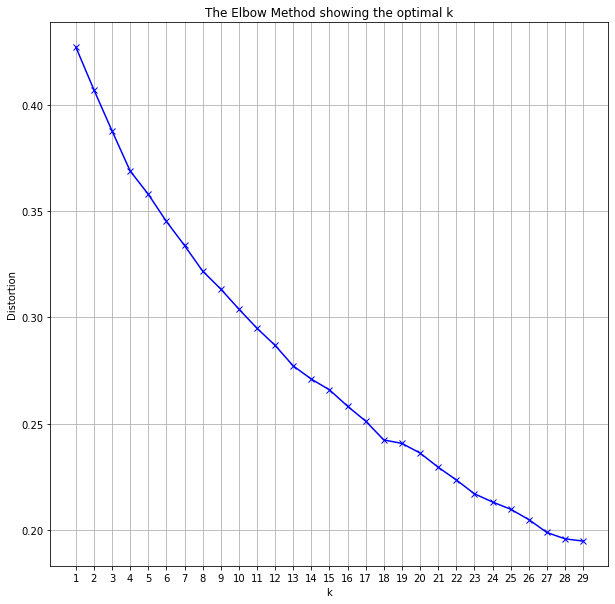

In [40]:
distortions = []
K = range(1,30)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(mumbai_grouped_clustering)
    kmeanModel.fit(mumbai_grouped_clustering)
    distortions.append(sum(np.min(cdist(mumbai_grouped_clustering, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / mumbai_grouped_clustering.shape[0])

# Plot the elbow
plt.figure(figsize = (10, 10))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.xticks(K)

plt.title('The Elbow Method showing the optimal k')
plt.grid()
plt.show()

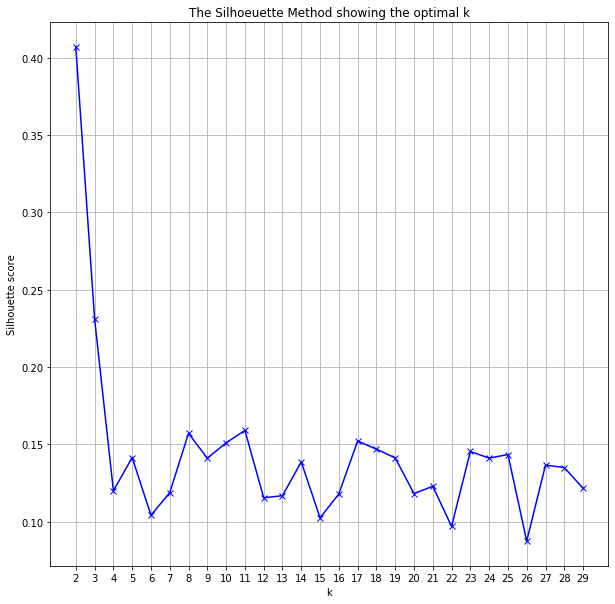

In [41]:
from sklearn.metrics import silhouette_samples, silhouette_score

indices = []
scores = []
K = list(range(2, 30))
for kclusters in  K:
    
    # Run k-means clustering
    kgc = mumbai_grouped_clustering
    kmeans = KMeans(n_clusters = kclusters, init = 'k-means++', random_state = 0).fit_predict(kgc)
    
    # Gets the score for the clustering operation performed
    score = silhouette_score(kgc, kmeans)
    
    # Appending the index and score to the respective lists
    indices.append(kclusters)
    scores.append(score)
    
plt.figure(figsize = (10, 10))
plt.plot(K, scores, 'bx-')
plt.xlabel('k')
plt.ylabel('Silhouette score')
plt.xticks(K)

plt.title('The Silhoeuette Method showing the optimal k')
plt.grid()
plt.show()

### Analysing both the methods we find 5 to be the optimal K value

### Clustering the neighborhoods

In [42]:
# set number of clusters
kclusters = 5

mumbai_grouped_clustering = mumbai_grouped.drop('Neighbourhood', axis=1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(mumbai_grouped_clustering)

# check cluster labels generated
np.unique(kmeans.labels_)

array([0, 1, 2, 3, 4])

In [43]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

mumbai_merged = df.dropna()

# merge mumbai_grouped with mumbai_data to add latitude/longitude for each neighborhood
mumbai_merged = mumbai_merged.join(neighborhoods_venues_sorted.set_index('Neighbourhood'), on='Neighbourhood')
mumbai_merged.dropna(inplace = True)
mumbai_merged["Cluster Labels"] = mumbai_merged["Cluster Labels"].astype(int)
mumbai_merged.reset_index(inplace = True, drop = True)

In [44]:
mumbai_merged["Cluster Labels"].unique()

array([4, 0, 2, 1, 3])

### Visualising the clusters

In [45]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(mumbai_merged['Latitude'], mumbai_merged['Longitude'], mumbai_merged['Neighbourhood'], mumbai_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

## Examining clusters in detail

### Cluster 0

This is the most populated cluster out of all. Most of the neighbourhoods have more than half of the 10 most common venues as eateries, generally small-scale Indian restaurants, for cheap and quick meals, as well as fast food chains and street food stalls. The most characteristic thing about this cluster is that these spots all lie very close to the Western and Central Railway Lines of the city, more so than other neighbourhoods.

In [46]:
a = mumbai_merged.loc[mumbai_merged['Cluster Labels'] == 0, mumbai_merged.columns[[0] + list(range(4, mumbai_merged.shape[1]))]]
print(a.shape)
a

(60, 11)


,Neighbourhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,Chakala,Hotel,Restaurant (Uncategorised),Cinema,Fast Food Chain,Asian Restaurant,Services,Regional Cuisine Restaurant,Italian Restaurant,Cafe,College Academic Building
2,D.N. Nagar,Grocery Store,Bar,Restaurant (Uncategorised),Asian Restaurant,Cafe,Clothing Store,Italian Restaurant,Fitness Center,Fast Food Chain,Automotive Shop
5,Lokhandwala,Dessert Shop,Restaurant (Uncategorised),Cafe,Fitness Center,Grocery Store,Fast Food Chain,Street Food Stall,Italian Restaurant,Middle Eastern Restaurant,Sports Ground
6,Marol,Restaurant (Uncategorised),Bus Station,Hotel,Street Food Stall,Train Station,Fast Food Chain,Asian Restaurant,Automotive Shop,Bank,Bar
7,Oshiwara,Cafe,Restaurant (Uncategorised),Dessert Shop,Bar,MexAmerican Restaurant,Asian Restaurant,Fitness Center,Regional Cuisine Restaurant,Italian Restaurant,Fast Food Chain
8,Poonam Nagar,Fitness Center,Restaurant (Uncategorised),Asian Restaurant,Dessert Shop,Train Station,Automotive Shop,Bank,Bar,Bus Station,Cafe
9,Saki Naka,Restaurant (Uncategorised),Cafe,Fast Food Chain,Bar,Regional Cuisine Restaurant,Italian Restaurant,Asian Restaurant,Services,Dessert Shop,MexAmerican Restaurant
13,Bandra Kurla Complex,Cafe,Restaurant (Uncategorised),Italian Restaurant,Fitness Center,Hotel,Arts Center,Regional Cuisine Restaurant,Dessert Shop,Asian Restaurant,European Restaurant
15,Gandhi Nagar,Restaurant (Uncategorised),Italian Restaurant,Bus Station,Bar,Sports Ground,Asian Restaurant,Regional Cuisine Restaurant,Cinema,MexAmerican Restaurant,Cafe
17,Pali Hill,Restaurant (Uncategorised),Dessert Shop,Bar,Asian Restaurant,Cafe,Italian Restaurant,European Restaurant,Fitness Center,Grocery Store,Fast Food Chain


### Cluster 1

Neighbourhoods with Fitness Centres like Club Houses, Gyms, Yoga Studios, etc, as the most common venues, while having other amenitues also available. Train and Bus stations in the vicinity for good connectivity. There is a characteristic lack of eateries in the list of common venues among these neighbourhoods.

In [47]:
a = mumbai_merged.loc[mumbai_merged['Cluster Labels'] == 1, mumbai_merged.columns[[0] + list(range(4, mumbai_merged.shape[1]))]]
print(a.shape)
a

(3, 11)


,Neighbourhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
29,Jogeshwari East,Fitness Center,Train Station,Asian Restaurant,Automotive Shop,Bank,Bar,Bus Station,Cafe,Cinema,Clothing Store
45,Pathanwadi,Fitness Center,Cafe,Train Station,Asian Restaurant,Automotive Shop,Bank,Bar,Bus Station,Cinema,Clothing Store
100,Fanas Wadi,Fitness Center,Train Station,Asian Restaurant,Automotive Shop,Bank,Bar,Bus Station,Cafe,Cinema,Clothing Store


### Cluster 2

This cluster has neighbourhoods having bars, pubs, nightclubs, and cafes as the most common venues. This includes the famous Parsi/Irani cafes in the Western Suburbs. This cluster has a larger spread of multi-cuisine restaurants available as compared to the rest. Non-eateries are mainly sports and fitness centres, clothing stores, and arts and entertainment centers.
Notably, it is more concentrated in the Southern Suburbs and Mumbai City area.

In [48]:
a = mumbai_merged.loc[mumbai_merged['Cluster Labels'] == 2, mumbai_merged.columns[[0] + list(range(4, mumbai_merged.shape[1]))]]
print(a.shape)
a

(29, 11)


,Neighbourhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
3,Four Bungalows,Bar,Grocery Store,Restaurant (Uncategorised),Cafe,Asian Restaurant,Italian Restaurant,Dessert Shop,Street Food Stall,Fast Food Chain,Automotive Shop
4,J B Nagar,Cafe,Restaurant (Uncategorised),Bar,Train Station,Asian Restaurant,Regional Cuisine Restaurant,Cinema,Hotel,Fitness Center,European Restaurant
10,Seven Bungalows,Asian Restaurant,Cafe,Bar,Regional Cuisine Restaurant,Italian Restaurant,Train Station,Fast Food Chain,Automotive Shop,Bank,Bus Station
11,Mira Road,Bar,Clothing Store,Cafe,Asian Restaurant,Restaurant (Uncategorised),MexAmerican Restaurant,Italian Restaurant,Dessert Shop,Cinema,Shopping Mall
14,Bandstand,Cafe,Dessert Shop,Grocery Store,Restaurant (Uncategorised),Fitness Center,Italian Restaurant,Arts Center,Regional Cuisine Restaurant,Park,Asian Restaurant
16,Land's End,Bar,Arts Center,Clothing Store,Fitness Center,Street Food Stall,Italian Restaurant,Cafe,Restaurant (Uncategorised),Asian Restaurant,Fast Food Chain
24,Bangur Nagar,Cafe,Grocery Store,Clothing Store,Street Food Stall,Fitness Center,Asian Restaurant,Automotive Shop,Bank,Bar,Bus Station
30,Charkop,Grocery Store,Sports Ground,Shops,Cafe,Dessert Shop,Fast Food Chain,Asian Restaurant,Automotive Shop,Bank,Bar
35,Damu nagar,Cafe,Dessert Shop,Train Station,Fitness Center,Asian Restaurant,Automotive Shop,Bank,Bar,Bus Station,Cinema
37,Thakur village,Dessert Shop,Cafe,Sports Ground,Fitness Center,Street Food Stall,Grocery Store,Fast Food Chain,Restaurant (Uncategorised),Bar,Park


### Cluster 3

This cluster has neighbourhoods nearest to Train Stations. Interestingly, as a consequence of this, the next most common venue category is street food stalls, supplying the needs of the busy, fast-moving crowd of the city.

In [49]:
a = mumbai_merged.loc[mumbai_merged['Cluster Labels'] == 3, mumbai_merged.columns[[0] + list(range(4, mumbai_merged.shape[1]))]]
print(a.shape)
a

(3, 11)


,Neighbourhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
43,Dindoshi,Street Food Stall,Train Station,Fitness Center,Asian Restaurant,Automotive Shop,Bank,Bar,Bus Station,Cafe,Cinema
49,Shivaji Talao,Shops,Street Food Stall,Train Station,Fast Food Chain,Asian Restaurant,Automotive Shop,Bank,Bar,Bus Station,Cafe
64,P L Lokhande Marg,Street Food Stall,Train Station,Fitness Center,Asian Restaurant,Automotive Shop,Bank,Bar,Bus Station,Cafe,Cinema


### Cluster 4

Neighbourhoods having Parks in the top 3 most common venues. Generally concentrated in the  Suburban region.

In [50]:
a = mumbai_merged.loc[mumbai_merged['Cluster Labels'] == 4, mumbai_merged.columns[[0] + list(range(4, mumbai_merged.shape[1]))]]
print(a.shape)
a

(11, 11)


,Neighbourhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Amboli,Asian Restaurant,Restaurant (Uncategorised),Park,Italian Restaurant,Fitness Center,Train Station,European Restaurant,Automotive Shop,Bank,Bar
12,Bhayandar,Park,Restaurant (Uncategorised),Hotel,Dessert Shop,Train Station,Fast Food Chain,Asian Restaurant,Automotive Shop,Bank,Bar
23,Motilal Nagar,Fitness Center,Cinema,Cafe,Dessert Shop,Italian Restaurant,Train Station,Asian Restaurant,Automotive Shop,Bank,Bar
31,Poisar,Fitness Center,Shops,Park,Cafe,Train Station,Fast Food Chain,Asian Restaurant,Automotive Shop,Bank,Bar
32,Hindustan Naka,Automotive Shop,Park,Italian Restaurant,Fitness Center,Train Station,Fast Food Chain,Asian Restaurant,Bank,Bar,Bus Station
52,Garodia Nagar,Dessert Shop,Park,Restaurant (Uncategorised),Street Food Stall,Fitness Center,Cafe,Cinema,Italian Restaurant,Arts Center,Asian Restaurant
54,Pant Nagar,Bar,Park,Dessert Shop,Train Station,Fitness Center,Asian Restaurant,Automotive Shop,Bank,Bus Station,Cafe
57,Chandivali,Fitness Center,Grocery Store,Cinema,Dessert Shop,Asian Restaurant,Automotive Shop,Bank,Bar,Bus Station,Cafe
61,Kannamwar Nagar,Arts Center,Restaurant (Uncategorised),Park,Dessert Shop,Fast Food Chain,Asian Restaurant,Automotive Shop,Bank,Bar,Bus Station
85,Malabar Hill,Park,Fast Food Chain,Restaurant (Uncategorised),Dessert Shop,Fitness Center,Train Station,Asian Restaurant,Automotive Shop,Bank,Bar
